In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
eco_21_22_exit = pd.read_excel("../Data/TEIS-NSS Project Data 10-2022.xlsx", sheet_name="ECO with Exit21-22")
eco_21_22_exit.head()

,DISTRICT,CHILD_ID,ECO_Entry_DATE,Ent SOCIAL_SCALE,Ent KNOWLEDGE_SCALE,Ent APPROPRIATE_ACTION_SCALE,ECO_Exit_DATE,Exit SOCIAL_SCALE,Exit KNOWLEDGE_SCALE,Exit APPROPRIATE_ACTION_SCALE,...,OC2 Data Check,OC3 - a,OC3 - b,OC3 - c,OC3 - d,OC3 - e,OC3 Data Check,Days btw Initial and Exit,Days btw I-IFSP to Exit ECO,Days btw I-IFSP to entry ECO
0,ET,500335.0,2021-04-23,5.0,3.0,4.0,2021-10-23,6.0,3.0,4.0,...,1.0,NaN,1.0,NaN,NaN,NaN,1.0,206.0,183.0,0.0
1,ET,479453.0,2020-03-23,7.0,7.0,7.0,2021-08-19,7.0,7.0,7.0,...,1.0,NaN,NaN,NaN,NaN,1.0,1.0,704.0,514.0,0.0
2,ET,510663.0,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,115.0,-44483.0,-44483.0
3,ET,452482.0,2019-01-31,2.0,3.0,3.0,2021-11-22,5.0,3.0,5.0,...,1.0,NaN,NaN,1.0,NaN,NaN,1.0,1053.0,1026.0,0.0
4,ET,506507.0,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,159.0,-44434.0,-44434.0


In [3]:
eco_21_22_data = pd.read_excel("../Data/TEIS-NSS Project Data 10-2022.xlsx", sheet_name="Elig Timeline Rpt 2018-2022")
eco_21_22_data.head()

,District,Child ID,Child Status,Child Phase,Init. IFSP Due Date,IFSP Due Date,IFSP Late Reason,Active Ref. Date,Parent Consent/Intake Date,Date Dev. Evaluator Rec'd. Ref.,...,# Days Parent Consent to Dev. Eval.,# Days Dev. Evaluator Assigned to Dev. Eval.,1st Date Requested to Receipt of Med. Records,# Days Dev. Eval. to Elig. Det.,# Days Ref. to Elig. Det.,Init. Elig. Decision,Init. Elig. Category,Init. Elig. Det. Date,Exit Date,Exit Reason
0,ET,453926,Inactive,IFSP,2019-03-04,2019-03-27,System,2019-01-18,2019-02-04,2019-01-22 00:00:00,...,17.0,30.0,NaN,4.0,38.0,Eligible,Developmental Evaluation,2019-02-25,2020-01-11,618 - Part B eligible
1,ET,431729,Inactive,IFSP,2018-10-26,2018-10-26,NaN,2018-09-11,2018-09-25,2018-09-12 00:00:00,...,0.0,13.0,NaN,6.0,20.0,Eligible,"Diagnosed Condition, Developmental Evaluation",2018-10-01,2020-12-11,618 - Part B eligibility not determined
2,ET,462474,Inactive,IFSP,2019-06-28,2019-06-14,NaN,2019-05-14,2019-05-30,2019-05-15 00:00:00,...,0.0,15.0,0.0,1.0,17.0,Eligible,Developmental Evaluation,2019-05-31,2020-11-12,618 - Part B eligibility not determined
3,ET,446841,Inactive,Eligibility,2018-11-23,NaT,NaN,2018-10-09,2018-10-25,2018-10-11 00:00:00,...,0.0,14.0,NaN,1.0,17.0,Eligible,Diagnosed Condition,2018-10-26,2020-08-12,Parent decline
4,ET,459629,Inactive,IFSP,2019-05-16,2019-04-24,NaN,2019-04-01,2019-04-10,2019-04-02 00:00:00,...,0.0,8.0,0.0,2.0,11.0,Eligible,Developmental Evaluation,2019-04-12,2019-09-26,618 - Parent withdraw


In [4]:
# Display columns in dataframe
eco_21_22_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67610 entries, 0 to 67609
Data columns (total 38 columns):
 #   Column                                            Non-Null Count  Dtype         
---  ------                                            --------------  -----         
 0   District                                          67610 non-null  object        
 1   Child ID                                          67610 non-null  int64         
 2   Child Status                                      67610 non-null  object        
 3   Child Phase                                       67610 non-null  object        
 4   Init. IFSP Due Date                               67610 non-null  datetime64[ns]
 5   IFSP Due Date                                     33237 non-null  datetime64[ns]
 6   IFSP Late Reason                                  4780 non-null   object        
 7   Active Ref. Date                                  67610 non-null  datetime64[ns]
 8   Parent Consent/Intake Date

In [5]:
# rename the columns ('CHILD_ID' > 'Child ID') so that i can join them later to the timeline data sheet
eco_21_22_exit = eco_21_22_exit.rename(columns = {'CHILD_ID':'Child ID'})
eco_21_22_exit.head()

,DISTRICT,Child ID,ECO_Entry_DATE,Ent SOCIAL_SCALE,Ent KNOWLEDGE_SCALE,Ent APPROPRIATE_ACTION_SCALE,ECO_Exit_DATE,Exit SOCIAL_SCALE,Exit KNOWLEDGE_SCALE,Exit APPROPRIATE_ACTION_SCALE,...,OC2 Data Check,OC3 - a,OC3 - b,OC3 - c,OC3 - d,OC3 - e,OC3 Data Check,Days btw Initial and Exit,Days btw I-IFSP to Exit ECO,Days btw I-IFSP to entry ECO
0,ET,500335.0,2021-04-23,5.0,3.0,4.0,2021-10-23,6.0,3.0,4.0,...,1.0,NaN,1.0,NaN,NaN,NaN,1.0,206.0,183.0,0.0
1,ET,479453.0,2020-03-23,7.0,7.0,7.0,2021-08-19,7.0,7.0,7.0,...,1.0,NaN,NaN,NaN,NaN,1.0,1.0,704.0,514.0,0.0
2,ET,510663.0,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,115.0,-44483.0,-44483.0
3,ET,452482.0,2019-01-31,2.0,3.0,3.0,2021-11-22,5.0,3.0,5.0,...,1.0,NaN,NaN,1.0,NaN,NaN,1.0,1053.0,1026.0,0.0
4,ET,506507.0,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,159.0,-44434.0,-44434.0


In [6]:
# renaming the columns ('Init. Elig. Category') because the . does not work well when calling on it later

eco_21_22_data = eco_21_22_data.rename(columns = {'Init. Elig. Category':'Init Elig Category'})
eco_21_22_data.head()

,District,Child ID,Child Status,Child Phase,Init. IFSP Due Date,IFSP Due Date,IFSP Late Reason,Active Ref. Date,Parent Consent/Intake Date,Date Dev. Evaluator Rec'd. Ref.,...,# Days Parent Consent to Dev. Eval.,# Days Dev. Evaluator Assigned to Dev. Eval.,1st Date Requested to Receipt of Med. Records,# Days Dev. Eval. to Elig. Det.,# Days Ref. to Elig. Det.,Init. Elig. Decision,Init Elig Category,Init. Elig. Det. Date,Exit Date,Exit Reason
0,ET,453926,Inactive,IFSP,2019-03-04,2019-03-27,System,2019-01-18,2019-02-04,2019-01-22 00:00:00,...,17.0,30.0,NaN,4.0,38.0,Eligible,Developmental Evaluation,2019-02-25,2020-01-11,618 - Part B eligible
1,ET,431729,Inactive,IFSP,2018-10-26,2018-10-26,NaN,2018-09-11,2018-09-25,2018-09-12 00:00:00,...,0.0,13.0,NaN,6.0,20.0,Eligible,"Diagnosed Condition, Developmental Evaluation",2018-10-01,2020-12-11,618 - Part B eligibility not determined
2,ET,462474,Inactive,IFSP,2019-06-28,2019-06-14,NaN,2019-05-14,2019-05-30,2019-05-15 00:00:00,...,0.0,15.0,0.0,1.0,17.0,Eligible,Developmental Evaluation,2019-05-31,2020-11-12,618 - Part B eligibility not determined
3,ET,446841,Inactive,Eligibility,2018-11-23,NaT,NaN,2018-10-09,2018-10-25,2018-10-11 00:00:00,...,0.0,14.0,NaN,1.0,17.0,Eligible,Diagnosed Condition,2018-10-26,2020-08-12,Parent decline
4,ET,459629,Inactive,IFSP,2019-05-16,2019-04-24,NaN,2019-04-01,2019-04-10,2019-04-02 00:00:00,...,0.0,8.0,0.0,2.0,11.0,Eligible,Developmental Evaluation,2019-04-12,2019-09-26,618 - Parent withdraw


In [7]:
# making a new dataframe out the information in the timeline sheet ('Elig Timeline Rpt 2018-2022')
# that only has the two columns i am interested in

eco_21_22_data = eco_21_22_data[['Child ID', 'Init Elig Category']]
eco_21_22_data.head()

,Child ID,Init Elig Category
0,453926,Developmental Evaluation
1,431729,"Diagnosed Condition, Developmental Evaluation"
2,462474,Developmental Evaluation
3,446841,Diagnosed Condition
4,459629,Developmental Evaluation


In [8]:
# making a new dataframe with only the columns I am interested in in the eco sheet

eco_21_22_exit = eco_21_22_exit[['Child ID', '<Calc> Entrance Age (months)', 'Days btw Initial and Exit', 'Days btw I-IFSP to Exit ECO']]
eco_21_22_exit.head()

,Child ID,<Calc> Entrance Age (months),Days btw Initial and Exit,Days btw I-IFSP to Exit ECO
0,500335.0,36.0,206.0,183.0
1,479453.0,36.0,704.0,514.0
2,510663.0,36.0,115.0,-44483.0
3,452482.0,36.0,1053.0,1026.0
4,506507.0,32.0,159.0,-44434.0


In [9]:
# renamed the age column to be easier to call in later on graphs

eco_21_22_exit = eco_21_22_exit.rename(columns = {'<Calc> Entrance Age (months)':'Age'})
eco_21_22_exit.head()

,Child ID,Age,Days btw Initial and Exit,Days btw I-IFSP to Exit ECO
0,500335.0,36.0,206.0,183.0
1,479453.0,36.0,704.0,514.0
2,510663.0,36.0,115.0,-44483.0
3,452482.0,36.0,1053.0,1026.0
4,506507.0,32.0,159.0,-44434.0


In [10]:
eco_21_22_exit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8636 entries, 0 to 8635
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Child ID                     8632 non-null   float64
 1   Age                          8632 non-null   float64
 2   Days btw Initial and Exit    8632 non-null   float64
 3   Days btw I-IFSP to Exit ECO  8632 non-null   float64
dtypes: float64(4)
memory usage: 270.0 KB


In [11]:
# making sure to exclude any data that's negative or not 6 at least 6 months

eco_21_22_exit = eco_21_22_exit.loc[eco_21_22_exit['Days btw Initial and Exit'] >= 183]
eco_21_22_exit = eco_21_22_exit.loc[eco_21_22_exit['Days btw I-IFSP to Exit ECO'] > 0]
eco_21_22_exit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5585 entries, 0 to 8630
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Child ID                     5585 non-null   float64
 1   Age                          5585 non-null   float64
 2   Days btw Initial and Exit    5585 non-null   float64
 3   Days btw I-IFSP to Exit ECO  5585 non-null   float64
dtypes: float64(4)
memory usage: 218.2 KB


In [12]:
# Merging both df's on child ID
combined_dataframe = eco_21_22_exit.merge(eco_21_22_data, how='inner', on='Child ID')
combined_dataframe.head()

,Child ID,Age,Days btw Initial and Exit,Days btw I-IFSP to Exit ECO,Init Elig Category
0,500335.0,36.0,206.0,183.0,Developmental Evaluation
1,479453.0,36.0,704.0,514.0,Developmental Evaluation
2,452482.0,36.0,1053.0,1026.0,Developmental Evaluation
3,494216.0,25.0,288.0,175.0,Developmental Evaluation
4,449725.0,34.0,444.0,348.0,Developmental Evaluation


In [13]:
# Grouping by 'Init Elig Category'
combined_dataframe_group = combined_dataframe.groupby('Init Elig Category')
combined_dataframe_group.head()

,Child ID,Age,Days btw Initial and Exit,Days btw I-IFSP to Exit ECO,Init Elig Category
0,500335.0,36.0,206.0,183.0,Developmental Evaluation
1,479453.0,36.0,704.0,514.0,Developmental Evaluation
2,452482.0,36.0,1053.0,1026.0,Developmental Evaluation
3,494216.0,25.0,288.0,175.0,Developmental Evaluation
4,449725.0,34.0,444.0,348.0,Developmental Evaluation
7,489949.0,20.0,533.0,345.0,"Diagnosed Condition, Developmental Evaluation"
9,473208.0,36.0,493.0,350.0,"Diagnosed Condition, Developmental Evaluation"
22,469115.0,36.0,789.0,688.0,"Diagnosed Condition, Developmental Evaluation"
27,491969.0,36.0,212.0,180.0,"Diagnosed Condition, Developmental Evaluation"
34,449508.0,36.0,1024.0,869.0,"Diagnosed Condition, Developmental Evaluation"


In [38]:
avg_days = combined_dataframe.groupby('Init Elig Category', as_index=False)['Days btw Initial and Exit'].mean()
avg_days.head()

,Init Elig Category,Days btw Initial and Exit
0,Developmental Evaluation,453.665929
1,Diagnosed Condition,687.132132
2,"Diagnosed Condition, Developmental Evaluation",623.359906


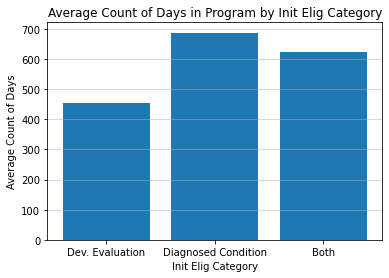

In [48]:
data = [453.665929,687.132132,623.359906]
plt.bar(['Dev. Evaluation','Diagnosed Condition','Both'], data)
plt.grid(linestyle='-', linewidth=0.5, axis='y')
plt.xlabel('Init Elig Category')
plt.ylabel('Average Count of Days')
plt.title('Average Count of Days in Program by Init Elig Category')
plt.show()

In [31]:
group_by_dataframe = combined_dataframe.groupby('Init Elig Category', as_index=False)['Init Elig Category'].value_counts()
group_by_dataframe

,Init Elig Category,count
0,Developmental Evaluation,4065
1,Diagnosed Condition,666
2,"Diagnosed Condition, Developmental Evaluation",853


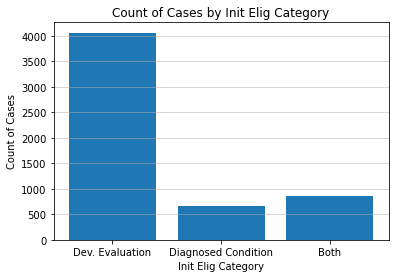

In [49]:
data = [4065,666,853]
plt.bar(['Dev. Evaluation','Diagnosed Condition','Both'], data)
plt.grid(linestyle='-', linewidth=0.5, axis='y')
plt.xlabel('Init Elig Category')
plt.ylabel('Count of Cases')
plt.title('Count of Cases by Init Elig Category')
plt.show()